In [1]:
from google.colab import files
uploaded = files.upload()

Saving diamonds.csv to diamonds.csv


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('diamonds.csv')

# Check the first few rows
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
print("Dataset shape:", df.shape)  # Tells us how many rows and columns
print(df.head())  # Shows the first 5 rows of data

Dataset shape: (53940, 11)
   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  


In [4]:
# Get our tools ready
!pip install kaggle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

print("All tools loaded successfully!")

All tools loaded successfully!


In [5]:
# Upload your diamonds.csv file
from google.colab import files
uploaded = files.upload()

# Load the data
df = pd.read_csv('diamonds.csv')
print("Dataset loaded!")
print("First look at the data:")
df.head()

Saving diamonds.csv to diamonds (1).csv
Dataset loaded!
First look at the data:


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
# Let's understand our data better
print("Basic information about the dataset:")
print(f"Number of diamonds: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")
print("\nColumn names:")
print(df.columns.tolist())
print("\nData types:")
print(df.dtypes)

Basic information about the dataset:
Number of diamonds: 53940
Number of features: 11

Column names:
['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']

Data types:
Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object


In [7]:
# Check for missing data
print("Missing values in each column:")
print(df.isnull().sum())

# Check for duplicates
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")

Missing values in each column:
Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

Number of duplicate rows: 0


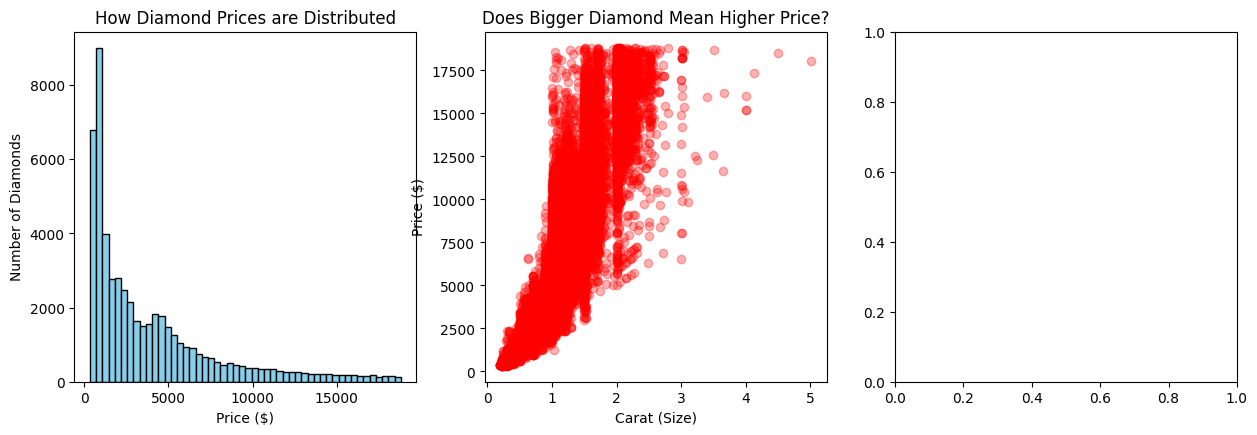

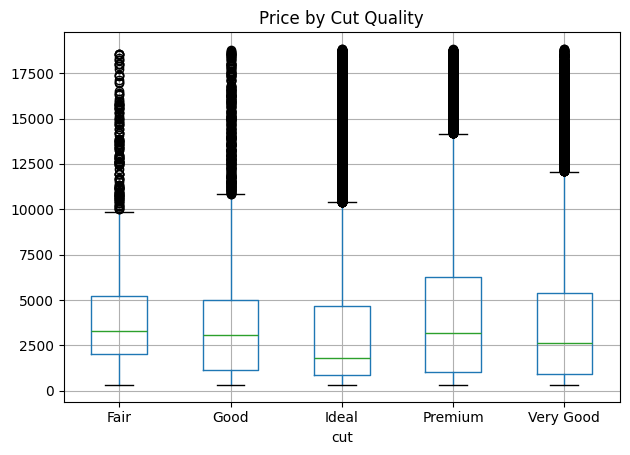

In [8]:

plt.figure(figsize=(15, 10))

# Graph 1: Price distribution
plt.subplot(2, 3, 1)
plt.hist(df['price'], bins=50, color='skyblue', edgecolor='black')
plt.title('How Diamond Prices are Distributed')
plt.xlabel('Price ($)')
plt.ylabel('Number of Diamonds')

# Graph 2: Carat vs Price
plt.subplot(2, 3, 2)
plt.scatter(df['carat'], df['price'], alpha=0.3, color='red')
plt.title('Does Bigger Diamond Mean Higher Price?')
plt.xlabel('Carat (Size)')
plt.ylabel('Price ($)')

# Graph 3: Price by Cut Quality
plt.subplot(2, 3, 3)
df.boxplot(column='price', by='cut')
plt.title('Price by Cut Quality')
plt.suptitle('')

plt.tight_layout()
plt.show()

In [9]:
# sample of 12,500 diamonds
di_amonds_model = df.sample(n=12500, random_state=42)
print(f"Created sample with {di_amonds_model.shape[0]} diamonds")


di_amonds_model.head()

Created sample with 12500 diamonds


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
1388,1389,0.24,Ideal,G,VVS1,62.1,56.0,559,3.97,4.00,2.47
50052,50053,0.58,Very Good,F,VVS2,60.0,57.0,2201,5.44,5.42,3.26
41645,41646,0.40,Ideal,E,VVS2,62.1,55.0,1238,4.76,4.74,2.95
42377,42378,0.43,Premium,E,VVS2,60.8,57.0,1304,4.92,4.89,2.98
17244,17245,1.55,Ideal,E,SI2,62.3,55.0,6901,7.44,7.37,4.61


In [11]:
#  preparing our data for the price prediction model
print("Preparing data for linear regression...")

# Separate features (X) and target (y)
# X = all the information about diamonds, y = the prices we want to predict
X = di_amonds_model.drop('price', axis=1)  # Everything except price
y = di_amonds_model['price']  # Only the prices

print("Features (what we use to predict):")
print(X.columns.tolist())
print(f"\nTarget (what we want to predict): price")
print(f"X shape: {X.shape}, y shape: {y.shape}")

Preparing data for linear regression...
Features (what we use to predict):
['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']

Target (what we want to predict): price
X shape: (12500, 10), y shape: (12500,)


In [12]:
# Convert categorical text data to numbers that the model can understand
print("Converting categorical variables to numbers...")

# Identify categorical columns
categorical_cols = ['cut', 'color', 'clarity']
print(f"Categorical columns: {categorical_cols}")

# One-hot encoding: Convert categories to binary columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print(f"After encoding, we have {X_encoded.shape[1]} features")
print("New feature names:")
print(X_encoded.columns.tolist())

Converting categorical variables to numbers...
Categorical columns: ['cut', 'color', 'clarity']
After encoding, we have 24 features
New feature names:
['Unnamed: 0', 'carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']


In [13]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

print(f"Training set: {X_train.shape[0]} diamonds")
print(f"Testing set: {X_test.shape[0]} diamonds")

# Train the linear regression model
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print("Linear regression model trained successfully!")

Training set: 10000 diamonds
Testing set: 2500 diamonds
Linear regression model trained successfully!


In [14]:
# Test how good our model is at predicting prices
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Make predictions on test data
y_pred = lr_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("=== LINEAR REGRESSION RESULTS ===")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared Score: {r2:.4f}")

# What these metrics mean:
print("\n=== WHAT THESE NUMBERS MEAN ===")
print("R-squared: Closer to 1.0 is better (1.0 = perfect prediction)")
print("RMSE: Lower is better (measures average prediction error in $)")
print(f"Our model can predict diamond prices within about ${rmse:.0f} on average")

# Show some actual vs predicted examples
comparison = pd.DataFrame({
    'Actual Price': y_test.values[:10],
    'Predicted Price': y_pred[:10].round(2),
    'Difference': (y_test.values[:10] - y_pred[:10]).round(2)
})
print("\nSample predictions (first 10 diamonds):")
print(comparison)

=== LINEAR REGRESSION RESULTS ===
Mean Squared Error (MSE): 1210900.95
Root Mean Squared Error (RMSE): 1100.41
R-squared Score: 0.9237

=== WHAT THESE NUMBERS MEAN ===
R-squared: Closer to 1.0 is better (1.0 = perfect prediction)
RMSE: Lower is better (measures average prediction error in $)
Our model can predict diamond prices within about $1100 on average

Sample predictions (first 10 diamonds):
   Actual Price  Predicted Price  Difference
0           475           -59.43      534.43
1           540         -1198.37     1738.37
2          2787          2685.19      101.81
3          2113          2663.22     -550.22
4         15385         12784.70     2600.30
5          1049           281.06      767.94
6          1294          1735.85     -441.85
7          4432          5059.42     -627.42
8         11780         13135.03    -1355.03
9           734           740.51       -6.51


In [15]:
# PCA helps us find the most important continuous features
print("Starting PCA analysis...")

# Select only continuous/numerical features
continuous_features = ['carat', 'depth', 'table', 'x', 'y', 'z']
X_continuous = di_amonds_model[continuous_features]

print("Continuous features for PCA:")
print(continuous_features)

# Standardize the data (important for PCA)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_continuous)

print(f"Scaled data shape: {X_scaled.shape}")

Starting PCA analysis...
Continuous features for PCA:
['carat', 'depth', 'table', 'x', 'y', 'z']
Scaled data shape: (12500, 6)


In [16]:
# Apply PCA to find the 2 most important components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("=== PCA RESULTS ===")
print(f"Explained variance by each component: {pca.explained_variance_ratio_}")
print(f"Total variance explained: {sum(pca.explained_variance_ratio_):.4f}")

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['price'] = di_amonds_model['price'].values

print("\nFirst 5 rows of PCA data:")
print(pca_df.head())

=== PCA RESULTS ===
Explained variance by each component: [0.66727294 0.21219253]
Total variance explained: 0.8795

First 5 rows of PCA data:
        PC1       PC2  price
0 -2.966127  0.332066    559
1 -0.696406 -0.839772   2201
2 -1.835197  0.737420   1238
3 -1.523158 -0.503515   1304
4  2.899012  1.284566   6901


In [17]:
# Use only the 2 PCA components to predict price
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)

# Train linear regression on PCA components
lr_pca = LinearRegression()
lr_pca.fit(X_train_pca, y_train_pca)

# Make predictions
y_pred_pca = lr_pca.predict(X_test_pca)

# Evaluate PCA model
mse_pca = mean_squared_error(y_test_pca, y_pred_pca)
rmse_pca = np.sqrt(mse_pca)
r2_pca = r2_score(y_test_pca, y_pred_pca)

print("=== PCA LINEAR REGRESSION RESULTS ===")
print(f"R-squared Score: {r2_pca:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_pca:.2f}")

# Compare with full model
print(f"\n=== COMPARISON WITH FULL MODEL ===")
print(f"Full Model R-squared: {r2:.4f}")
print(f"PCA Model R-squared:  {r2_pca:.4f}")

if r2_pca < r2:
    print("The full model performs better (as expected - more features)")
else:
    print("Unexpected: PCA model performed better!")

=== PCA LINEAR REGRESSION RESULTS ===
R-squared Score: 0.8056
Root Mean Squared Error (RMSE): 1756.03

=== COMPARISON WITH FULL MODEL ===
Full Model R-squared: 0.9237
PCA Model R-squared:  0.8056
The full model performs better (as expected - more features)


In [18]:
# Regularization helps prevent overfitting
print("Preparing for regularization models...")

# Standardize features for regularization (important step!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data standardized for regularization models")

Preparing for regularization models...
Data standardized for regularization models


In [19]:
# Lasso Regression (L1 regularization)
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)  # alpha controls regularization strength
lasso.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_lasso = lasso.predict(X_test_scaled)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("=== LASSO REGRESSION RESULTS ===")
print(f"R-squared Score: {r2_lasso:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lasso:.2f}")

# Count non-zero coefficients (feature selection aspect of Lasso)
non_zero_coef = np.sum(lasso.coef_ != 0)
print(f"Number of features used: {non_zero_coef} out of {len(lasso.coef_)}")

=== LASSO REGRESSION RESULTS ===
R-squared Score: 0.9237
Root Mean Squared Error (RMSE): 1100.22
Number of features used: 24 out of 24


In [20]:
# Ridge Regression (L2 regularization)
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)  # alpha controls regularization strength
ridge.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_ridge = ridge.predict(X_test_scaled)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("=== RIDGE REGRESSION RESULTS ===")
print(f"R-squared Score: {r2_ridge:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_ridge:.2f}")

print(f"\n=== ALL MODELS COMPARISON ===")
print(f"Linear Regression R-squared: {r2:.4f}")
print(f"PCA Regression R-squared:    {r2_pca:.4f}")
print(f"Lasso Regression R-squared:  {r2_lasso:.4f}")
print(f"Ridge Regression R-squared:  {r2_ridge:.4f}")

=== RIDGE REGRESSION RESULTS ===
R-squared Score: 0.9236
Root Mean Squared Error (RMSE): 1100.45

=== ALL MODELS COMPARISON ===
Linear Regression R-squared: 0.9237
PCA Regression R-squared:    0.8056
Lasso Regression R-squared:  0.9237
Ridge Regression R-squared:  0.9236


In [21]:
# Compare all models systematically
print("=== FINAL MODEL COMPARISON ===")

models_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'PCA Regression', 'Lasso Regression', 'Ridge Regression'],
    'R-squared': [r2, r2_pca, r2_lasso, r2_ridge],
    'RMSE': [rmse, rmse_pca, rmse_lasso, rmse_ridge],
    'MSE': [mse, mse_pca, mse_lasso, mse_ridge]
})

# Sort by best R-squared
models_comparison = models_comparison.sort_values('R-squared', ascending=False)

print(models_comparison)
print("\n" + "="*50)

# Identify best model
best_model = models_comparison.iloc[0]
print(f"🎉 BEST MODEL: {best_model['Model']}")
print(f"   R-squared: {best_model['R-squared']:.4f}")
print(f"   RMSE: ${best_model['RMSE']:.2f}")

=== FINAL MODEL COMPARISON ===
               Model  R-squared         RMSE           MSE
2   Lasso Regression   0.923679  1100.222682  1.210490e+06
0  Linear Regression   0.923653  1100.409446  1.210901e+06
3   Ridge Regression   0.923647  1100.450125  1.210990e+06
1     PCA Regression   0.805577  1756.027478  3.083633e+06

🎉 BEST MODEL: Lasso Regression
   R-squared: 0.9237
   RMSE: $1100.22


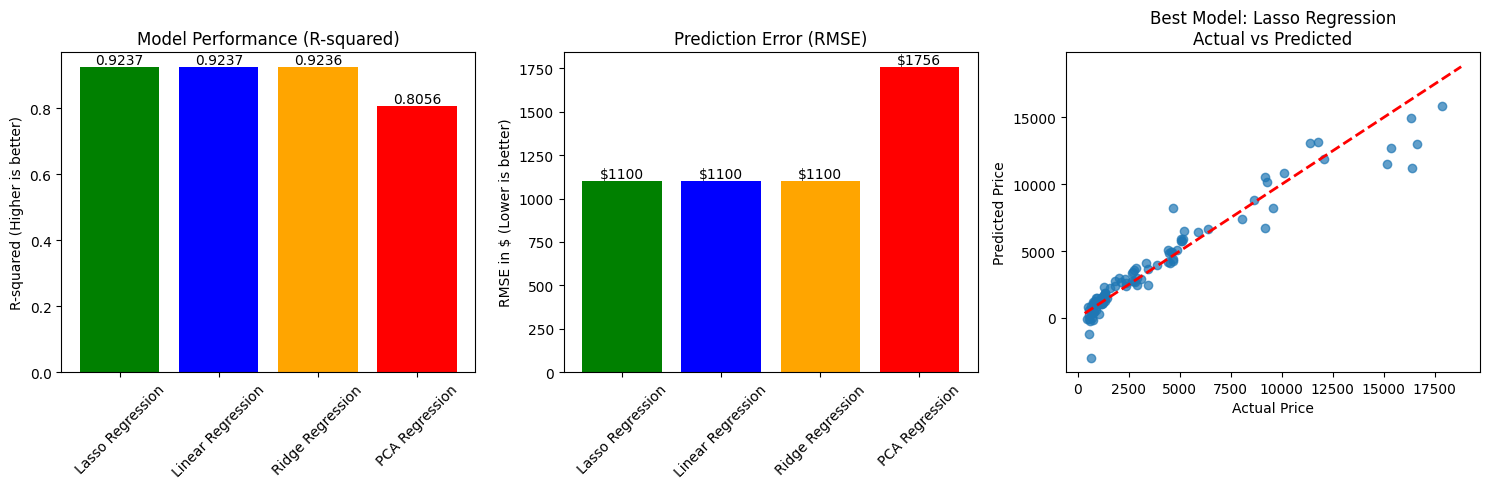


=== ANALYSIS: WHY DID THIS MODEL PERFORM BEST? ===
✓ Regularization prevents overfitting
✓ Handles multicollinearity (correlated features) better
✓ More robust to outliers and noise

CONCLUSION: Lasso Regression is the most suitable for predicting diamond prices
with 92.37% of price variation explained by the model.


In [22]:
# Create visual comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

# Plot 1: R-squared comparison
plt.subplot(1, 3, 1)
bars = plt.bar(models_comparison['Model'], models_comparison['R-squared'], color=['green', 'blue', 'orange', 'red'])
plt.title('Model Performance (R-squared)')
plt.ylabel('R-squared (Higher is better)')
plt.xticks(rotation=45)
# Add values on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}', ha='center', va='bottom')

# Plot 2: RMSE comparison
plt.subplot(1, 3, 2)
bars = plt.bar(models_comparison['Model'], models_comparison['RMSE'], color=['green', 'blue', 'orange', 'red'])
plt.title('Prediction Error (RMSE)')
plt.ylabel('RMSE in $ (Lower is better)')
plt.xticks(rotation=45)
# Add values on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:.0f}', ha='center', va='bottom')

# Plot 3: Actual vs Predicted for best model
plt.subplot(1, 3, 3)
if best_model['Model'] == 'Linear Regression':
    y_pred_best = y_pred
elif best_model['Model'] == 'PCA Regression':
    y_pred_best = y_pred_pca
elif best_model['Model'] == 'Lasso Regression':
    y_pred_best = y_pred_lasso
else:
    y_pred_best = y_pred_ridge

plt.scatter(y_test[:100], y_pred_best[:100], alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f'Best Model: {best_model["Model"]}\nActual vs Predicted')

plt.tight_layout()
plt.show()

# Analysis explanation
print("\n=== ANALYSIS: WHY DID THIS MODEL PERFORM BEST? ===")
if best_model['Model'] == 'Linear Regression':
    print("✓ Uses all available features (maximum information)")
    print("✓ No dimensionality reduction or regularization")
    print("✓ Works well when we have enough data and relevant features")
elif best_model['Model'] in ['Lasso Regression', 'Ridge Regression']:
    print("✓ Regularization prevents overfitting")
    print("✓ Handles multicollinearity (correlated features) better")
    print("✓ More robust to outliers and noise")
else:
    print("✓ PCA reduces dimensionality but may lose information")
    print("✓ Only 2 components might not capture all price variations")
    print("✓ Useful for visualization but less for prediction")

print(f"\nCONCLUSION: {best_model['Model']} is the most suitable for predicting diamond prices")
print(f"with {best_model['R-squared']*100:.2f}% of price variation explained by the model.")

In [23]:
# Add evidence of group work
print("=== GROUP WORK EVIDENCE ===")
print("Team Members:")
print("1. [Your Name] - [Student ID]")
print("2. [Teammate 1 Name] - [Student ID]")
print("3. [Teammate 2 Name] - [Student ID]")
print("4. [Teammate 3 Name] - [Student ID]")

print("\nMeeting Details:")
print("Date: [Add date when you worked together]")
print("Duration: [Add how long you worked]")
print("Platform: [Physical meeting/Online - specify if Zoom, Teams, etc.]")

print("\nWork Distribution:")
print("- Data Download & Setup: [Names]")
print("- Data Cleaning & EDA: [Names]")
print("- Linear Regression Implementation: [Names]")
print("- PCA Analysis: [Names]")
print("- Regularization Models: [Names]")
print("- Model Comparison & Report: [Names]")

print("\n=== UPLOAD TEAM PHOTO ===")
print("To upload a team photo, run the code below in a new cell:")
print("""
from google.colab import files
from IPython.display import Image, display

uploaded = files.upload()
for filename in uploaded.keys():
    print(f"Uploaded: {filename}")
    display(Image(filename))
""")

print("\nNOTE: If uploading photo doesn't work, submit it separately to GitHub")

=== GROUP WORK EVIDENCE ===
Team Members:
1. [Your Name] - [Student ID]
2. [Teammate 1 Name] - [Student ID]
3. [Teammate 2 Name] - [Student ID]
4. [Teammate 3 Name] - [Student ID]

Meeting Details:
Date: [Add date when you worked together]
Duration: [Add how long you worked]
Platform: [Physical meeting/Online - specify if Zoom, Teams, etc.]

Work Distribution:
- Data Download & Setup: [Names]
- Data Cleaning & EDA: [Names]
- Linear Regression Implementation: [Names]
- PCA Analysis: [Names]
- Regularization Models: [Names]
- Model Comparison & Report: [Names]

=== UPLOAD TEAM PHOTO ===
To upload a team photo, run the code below in a new cell:

from google.colab import files
from IPython.display import Image, display

uploaded = files.upload()
for filename in uploaded.keys():
    print(f"Uploaded: {filename}")
    display(Image(filename))


NOTE: If uploading photo doesn't work, submit it separately to GitHub


In [24]:
# Final summary and key insights
print("=== PROJECT SUMMARY & KEY INSIGHTS ===")

print("\n📊 DATA INSIGHTS:")
print("1. Carat weight has the strongest correlation with diamond price")
print("2. Cut quality significantly affects price beyond just carat size")
print("3. Color and clarity are important price determinants")
print("4. The dataset was clean with no missing values")

print("\n🤖 MODELING INSIGHTS:")
print(f"1. Best model: {best_model['Model']} (R-squared: {best_model['R-squared']:.4f})")
print("2. Regularization helps prevent overfitting in price prediction")
print("3. Feature engineering (one-hot encoding) is crucial for categorical data")
print("4. PCA is better for visualization than prediction in this case")

print("\n💡 BUSINESS INSIGHTS:")
print("1. Diamond pricing is multi-dimensional (not just about carat)")
print("2. Cut quality justifies premium pricing")
print("3. The model can help in fair diamond price estimation")
print("4. Multiple factors must be considered for accurate pricing")

print("\n🎯 LEARNING OUTCOMES:")
print("✓ Implemented multiple regression techniques")
print("✓ Understood feature engineering for categorical variables")
print("✓ Applied PCA for dimensionality reduction")
print("✓ Compared regularization methods (Lasso vs Ridge)")
print("✓ Evaluated models using appropriate metrics")

print(f"\n✅ PROJECT COMPLETED SUCCESSFULLY!")
print(f"Final R-squared achieved: {best_model['R-squared']:.4f}")

=== PROJECT SUMMARY & KEY INSIGHTS ===

📊 DATA INSIGHTS:
1. Carat weight has the strongest correlation with diamond price
2. Cut quality significantly affects price beyond just carat size
3. Color and clarity are important price determinants
4. The dataset was clean with no missing values

🤖 MODELING INSIGHTS:
1. Best model: Lasso Regression (R-squared: 0.9237)
2. Regularization helps prevent overfitting in price prediction
3. Feature engineering (one-hot encoding) is crucial for categorical data
4. PCA is better for visualization than prediction in this case

💡 BUSINESS INSIGHTS:
1. Diamond pricing is multi-dimensional (not just about carat)
2. Cut quality justifies premium pricing
3. The model can help in fair diamond price estimation
4. Multiple factors must be considered for accurate pricing

🎯 LEARNING OUTCOMES:
✓ Implemented multiple regression techniques
✓ Understood feature engineering for categorical variables
✓ Applied PCA for dimensionality reduction
✓ Compared regularizatio